In [ ]:
# Import core libraries
import pandas as pd              # for data cleaning, manipulation
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns            # for advanced visualizations

In [ ]:
# Load CSV files
emp = pd.read_csv("Employee.csv")
perf = pd.read_csv("PerformanceRating.csv")

# Show first 5 rows
print(emp.head())
print(perf.head())

  EmployeeID   FirstName LastName      Gender  Age BusinessTravel  \
0  3012-1A41    Leonelle    Simco      Female   30    Some Travel   
1  CBCB-9C9D     Leonerd    Aland        Male   38    Some Travel   
2  95D7-1CE9       Ahmed    Sykes        Male   43    Some Travel   
3  47A0-559B  Ermentrude   Berrie  Non-Binary   39    Some Travel   
4  42CC-040A       Stace   Savege      Female   29    Some Travel   

        Department  DistanceFromHome (KM) State                Ethnicity  ...  \
0            Sales                     27    IL                    White  ...   
1            Sales                     23    CA                    White  ...   
2  Human Resources                     29    CA  Asian or Asian American  ...   
3       Technology                     12    IL                    White  ...   
4  Human Resources                     29    CA                    White  ...   

   MaritalStatus  Salary StockOptionLevel OverTime    HireDate  Attrition  \
0       Divorced  102

In [ ]:
# Dataset overview
print(emp.info())
print(emp.describe())   # summary stats for numeric columns

# Check missing values
print(emp.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [ ]:
# Drop duplicates
emp = emp.drop_duplicates()

# Fill missing values
emp['JobRole'].fillna("Unknown", inplace=True)
emp['Age'].fillna(emp['Age'].median(), inplace=True)   # replace missing ages with median

# Verify
print(emp.isnull().sum())

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


/tmp/ipython-input-722498657.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  emp['JobRole'].fillna("Unknown", inplace=True)
/tmp/ipython-input-722498657.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Merge datasets on EmployeeID
df = emp.merge(perf, on="EmployeeID", how="left")

print(df.shape)   # check rows and columns after merge

(6899, 33)


In [ ]:
# Convert Attrition into binary (Yes=1, No=0)
df['Attrition_Flag'] = df['Attrition'].apply(lambda x: 1 if x.strip().upper() == "YES" else 0)

# Create Age Groups
bins = [18, 25, 35, 45, 60]
labels = ["18-25", "26-35", "36-45", "46-60"]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

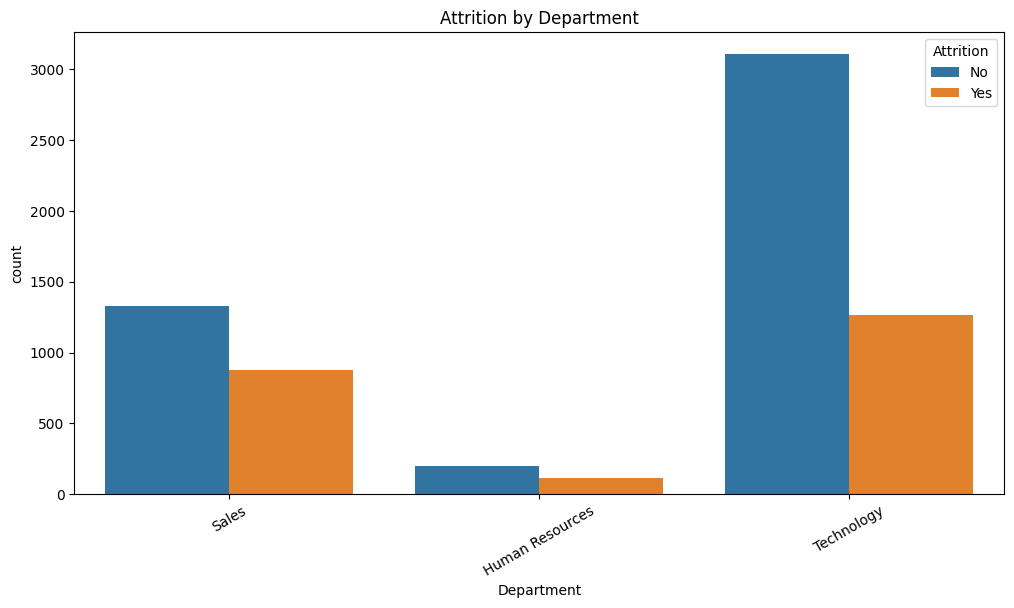

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-2414203101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jobrole_attrition.values, y=jobrole_attrition.index, palette="viridis")


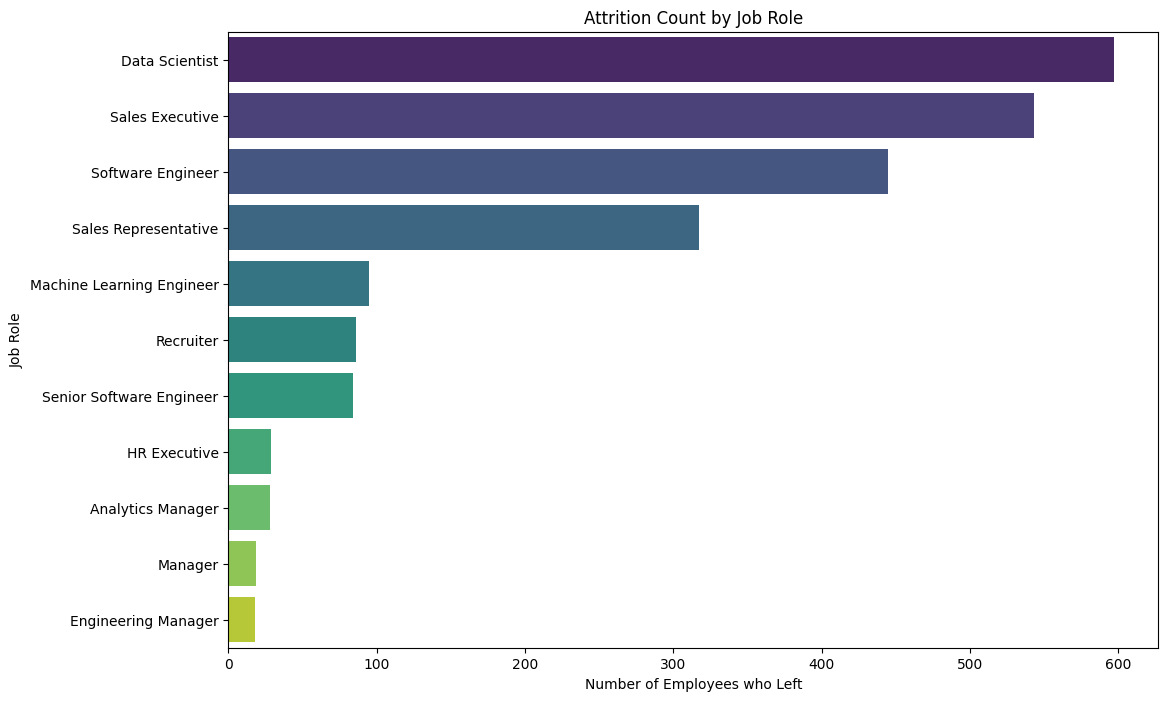

In [ ]:
plt.figure(figsize=(12,8))
jobrole_attrition = df[df["Attrition"]=="Yes"]["JobRole"].value_counts()
sns.barplot(x=jobrole_attrition.values, y=jobrole_attrition.index, palette="viridis")
plt.title("Attrition Count by Job Role")
plt.xlabel("Number of Employees who Left")
plt.ylabel("Job Role")
plt.show()

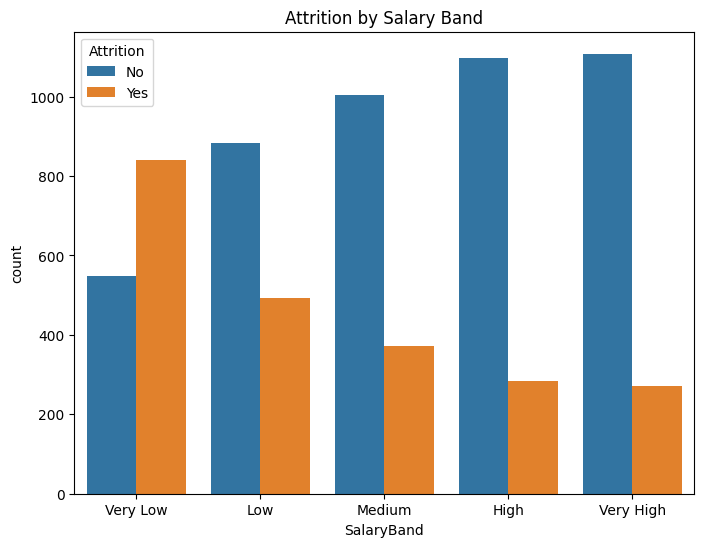

In [ ]:
df["SalaryBand"] = pd.qcut(df["Salary"], 5, labels=["Very Low","Low","Medium","High","Very High"])

plt.figure(figsize=(8,6))
sns.countplot(x="SalaryBand", hue="Attrition", data=df)
plt.title("Attrition by Salary Band")
plt.show()

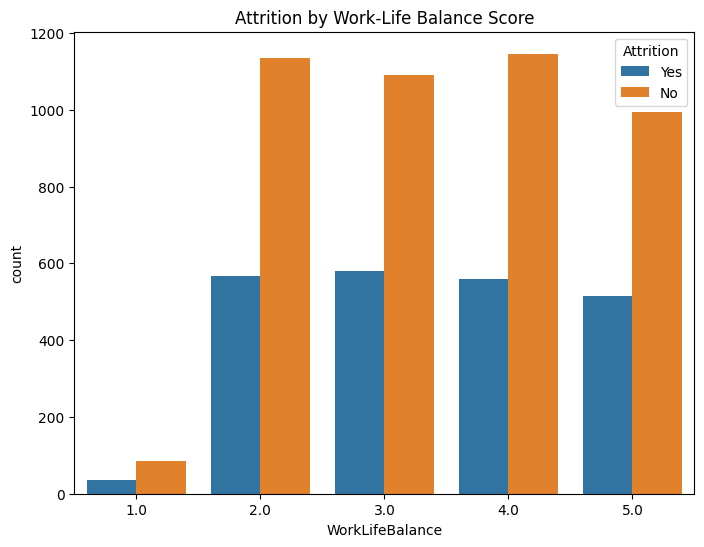

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df)
plt.title("Attrition by Work-Life Balance Score")
plt.show()

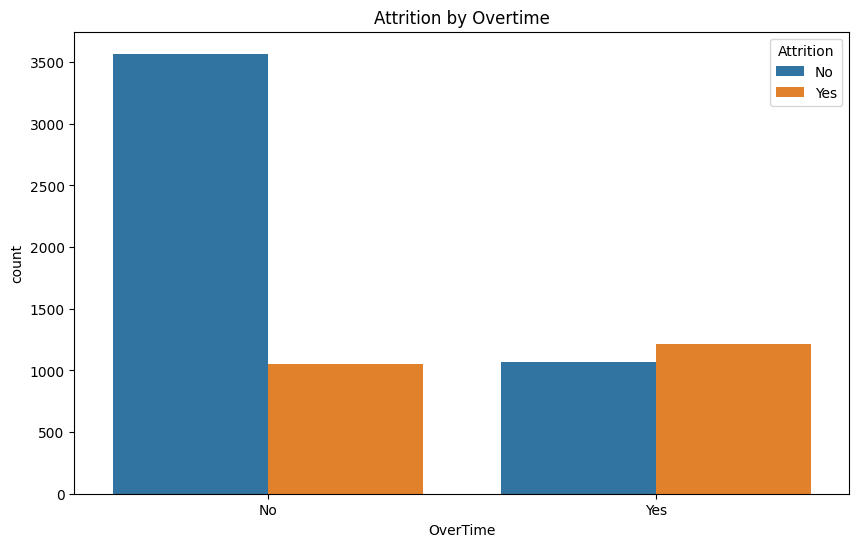

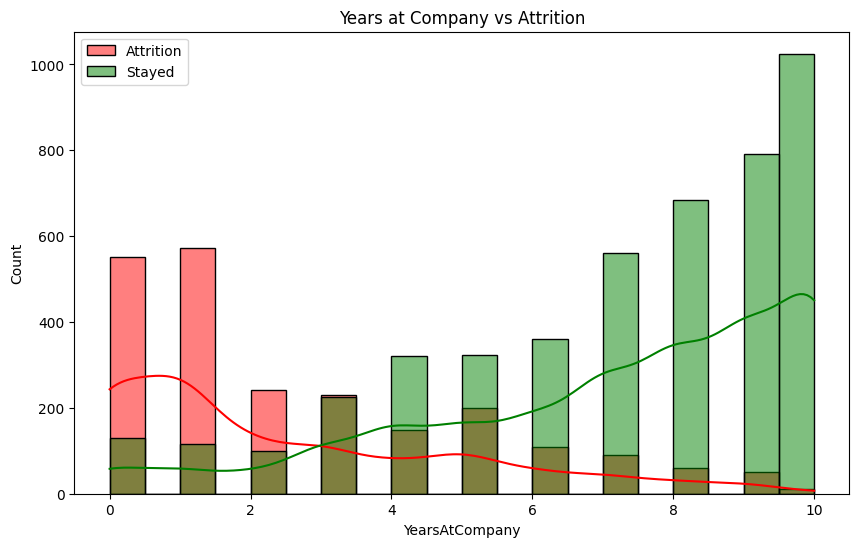

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition by Overtime")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df[df["Attrition"]=="Yes"]["YearsAtCompany"], bins=20, kde=True, color="red", label="Attrition")
sns.histplot(df[df["Attrition"]=="No"]["YearsAtCompany"], bins=20, kde=True, color="green", label="Stayed")
plt.legend()
plt.title("Years at Company vs Attrition")
plt.show()

<Figure size 800x600 with 0 Axes>

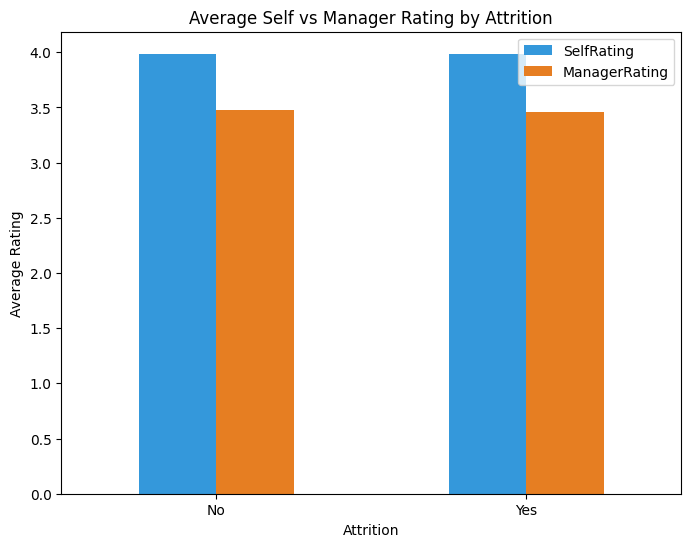

In [ ]:
plt.figure(figsize=(8,6))
avg_ratings = df.groupby("Attrition")[["SelfRating","ManagerRating"]].mean().reset_index()

avg_ratings.plot(
    x="Attrition",
    y=["SelfRating","ManagerRating"],
    kind="bar",
    figsize=(8,6),
    color=["#3498db","#e67e22"]
)
plt.title("Average Self vs Manager Rating by Attrition")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()

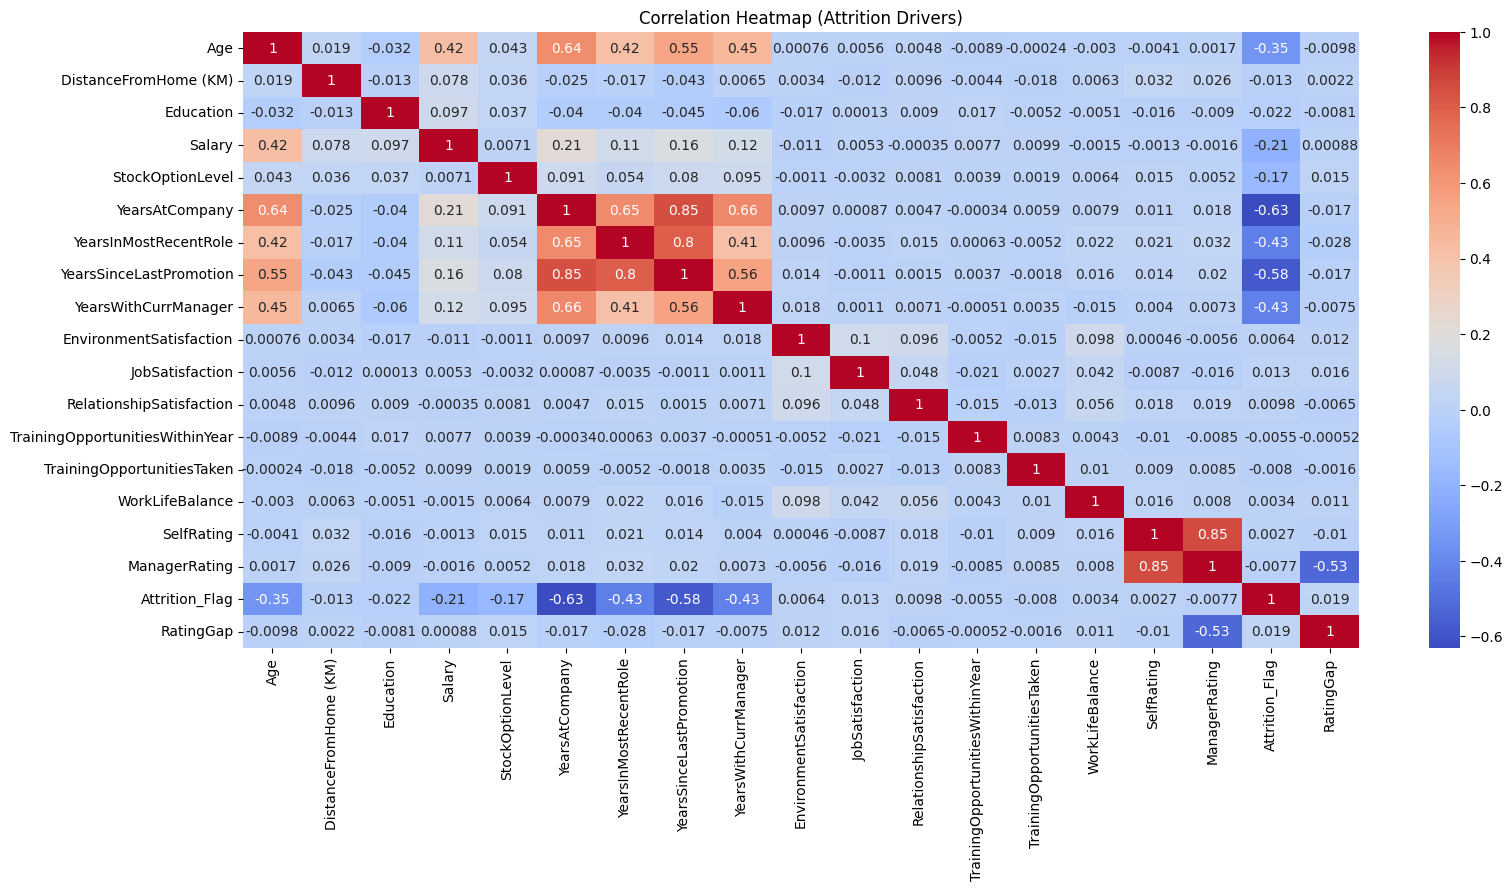

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Attrition Drivers)")
plt.show()

In [50]:
# Save cleaned dataset for SQL / Tableau
df.to_csv("cleaned_hr_data.csv", index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


**Key Insights seen through the graphical representation:**

- Attrition by Department: Sales and R&D departments face the highest attrition, signaling role-specific stress and growth concerns.

- Attrition by Job Role: Sales Executives and Technical roles show the highest churn, highlighting strong external market pull.

- Attrition by Salary Band: Lower-salary employees are more likely to leave, pointing to compensation dissatisfaction.

- Attrition by Work-Life Balance: Poor work-life balance strongly drives attrition, indicating risk of burnout.

- Attrition by Overtime: High overtime correlates with higher exits, reflecting workload and staffing issues.

- Years at Company vs Attrition: Most employees leave within the first 3 years, showing weak early retention.

- Self vs Manager Rating: Lower manager ratings and rating gaps are linked to higher attrition, suggesting recognition issues.

- Correlation Heatmap: Attrition is most influenced by salary, overtime, satisfaction, and tenure, validating key retention levers.